# Import Libraries

In [157]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# Load Dataset

In [158]:
df = pd.read_csv('./Fish.csv')

In [159]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Data Exploration

In [160]:
df.shape

(159, 7)

In [161]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [163]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [164]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


# Data Visualization

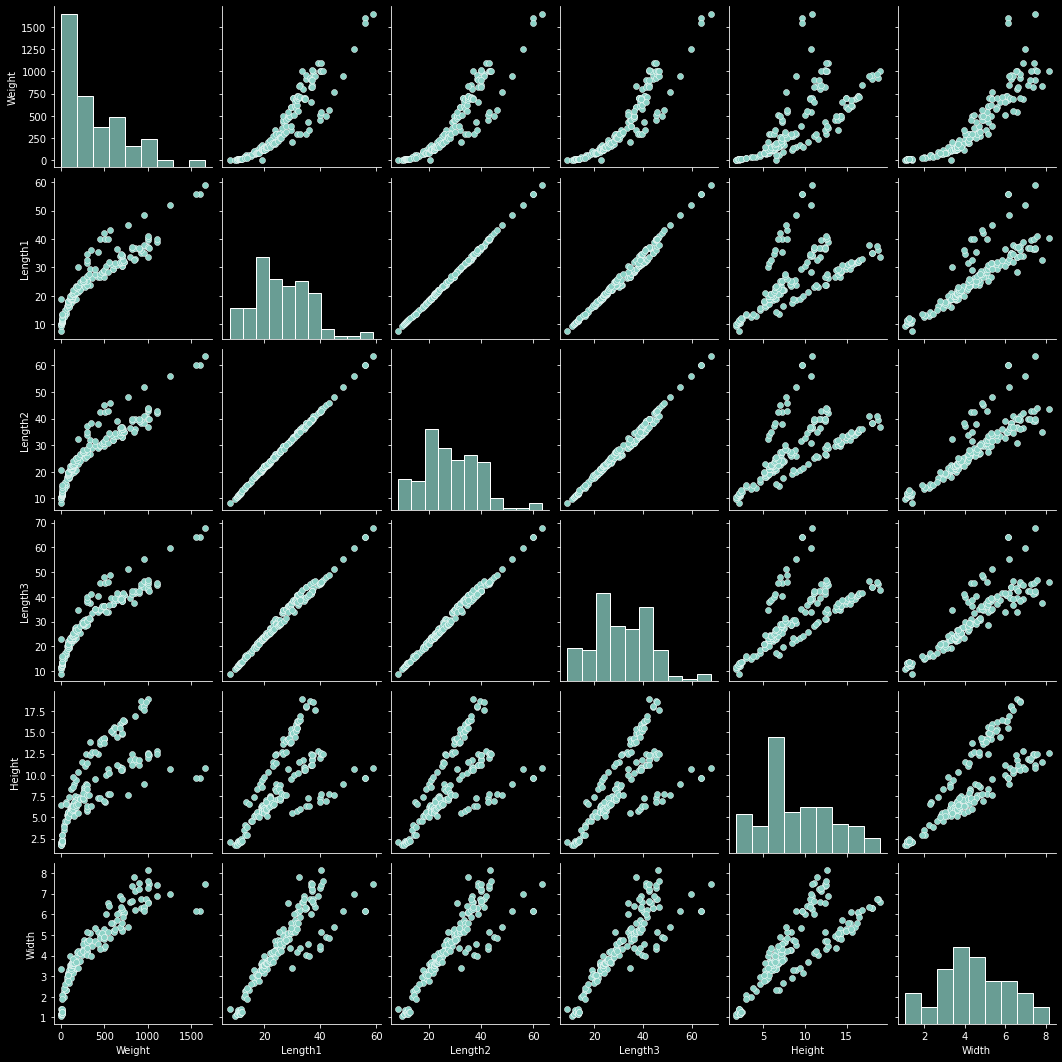

In [165]:
plt.style.use('dark_background')
sns.pairplot(df)

<AxesSubplot:xlabel='Length1', ylabel='Weight'>

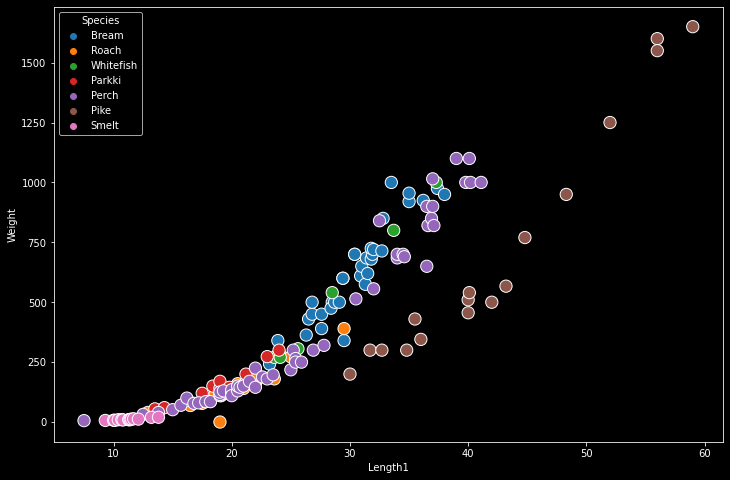

In [166]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Length1',y='Weight',hue='Species',data=df,s=150,palette='tab10')

<AxesSubplot:xlabel='Length2', ylabel='Weight'>

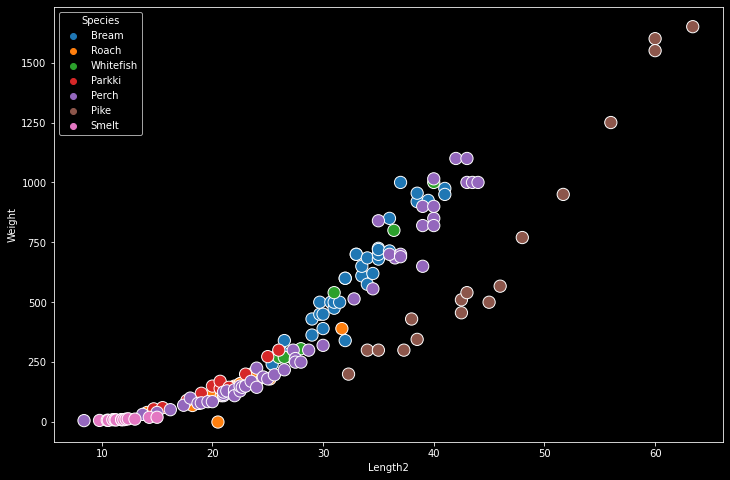

In [167]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Length2',y='Weight',hue='Species',data=df,s=150,palette='tab10')

<AxesSubplot:xlabel='Length3', ylabel='Weight'>

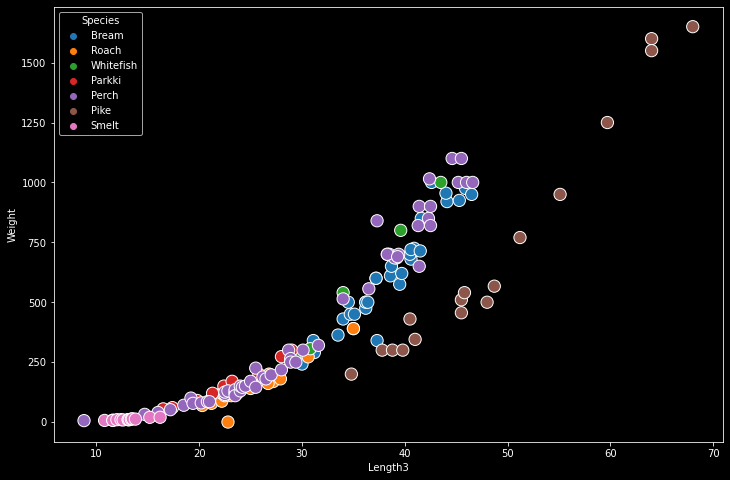

In [168]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Length3',y='Weight',hue='Species',data=df,s=150,palette='tab10')

<AxesSubplot:xlabel='Width', ylabel='Weight'>

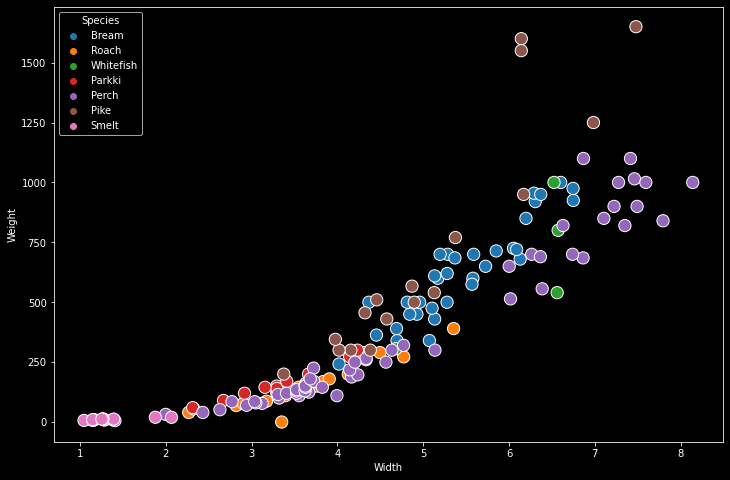

In [169]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Width',y='Weight',hue='Species',data=df,s=150,palette='tab10')

<AxesSubplot:xlabel='Height', ylabel='Weight'>

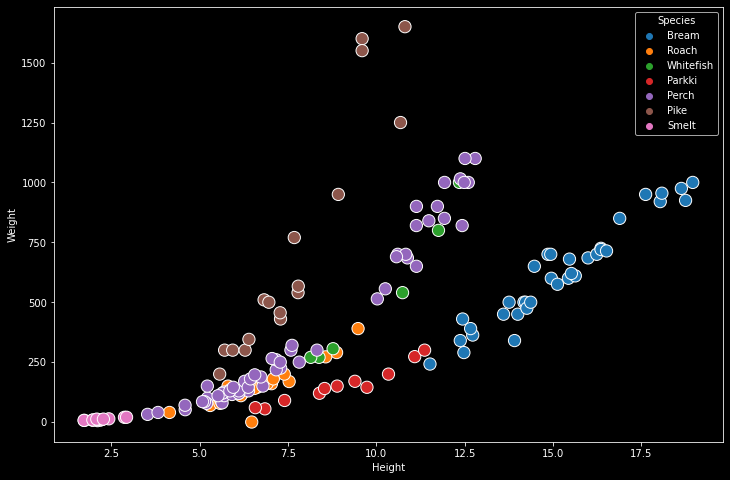

In [170]:
plt.style.use('dark_background')
plt.figure(figsize=(12,8))
sns.scatterplot(x='Height',y='Weight',hue='Species',data=df,s=150,palette='tab10')

# Drop Species column

In [171]:
df = df.drop('Species',axis=1)

# Data Spliting

In [172]:
x=df.drop('Weight',axis=1).values
y=df['Weight'].values

In [173]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100,shuffle=True)

# Model 

In [174]:
lm = LinearRegression()
lm.fit(train_x,train_y)

LinearRegression()

In [175]:
print(f'Intercep : {lm.intercept_}')
print(f'Coefficent : {lm.coef_}')

Intercep : -508.4596714942162
Coefficent : [ 72.05073579 -25.63762345 -19.04539816  22.52267905  30.38242903]


In [176]:
pred = lm.predict(test_x)

# Accuracy 

In [177]:
r2_score(pred,test_y)

0.8954100039412451

In [178]:
mean_absolute_error(pred,test_y)

94.66620334873912

In [179]:
mean_squared_error(pred,test_y)

12283.928623592332